In [198]:
import torch
torch.cuda.is_available()

True

In [199]:
import pandas as pd
data=pd.read_csv("data.csv")

In [200]:
data

,CODES,DATES,OPEN,CLOSE,HIGH,LOW,PCTCHANGE,VOLUME,AMOUNT
0,00700.HK,2013/06/20,293.0,290.2,295.2,289.2,-3.137516,6211282.0,1.808140e+09
1,00700.HK,2013/06/21,287.2,285.8,288.0,280.2,-1.516196,8791055.0,2.501875e+09
2,00700.HK,2013/06/24,281.8,278.6,282.0,276.0,-2.519244,5629092.0,1.569112e+09
3,00700.HK,2013/06/25,278.0,283.4,285.6,269.4,1.722900,6855212.0,1.914464e+09
4,00700.HK,2013/06/26,283.6,290.4,291.0,279.6,2.470007,5154973.0,1.470365e+09
...,...,...,...,...,...,...,...,...,...
2225,00700.HK,2022/07/05,348.0,348.8,353.4,347.4,0.518700,19486553.0,6.813335e+09
2226,00700.HK,2022/07/06,349.0,347.6,353.0,340.8,-0.344000,24822317.0,8.584681e+09
2227,00700.HK,2022/07/07,343.2,351.6,351.6,342.8,1.150700,18985683.0,6.614922e+09
2228,00700.HK,2022/07/08,357.2,352.6,357.2,348.6,0.284400,18754352.0,6.594435e+09


In [201]:
data.index=data["DATES"]
print(data["CLOSE"])

DATES
2013/06/20    290.2
2013/06/21    285.8
2013/06/24    278.6
2013/06/25    283.4
2013/06/26    290.4
              ...  
2022/07/05    348.8
2022/07/06    347.6
2022/07/07    351.6
2022/07/08    352.6
2022/07/11    342.4
Name: CLOSE, Length: 2230, dtype: float64


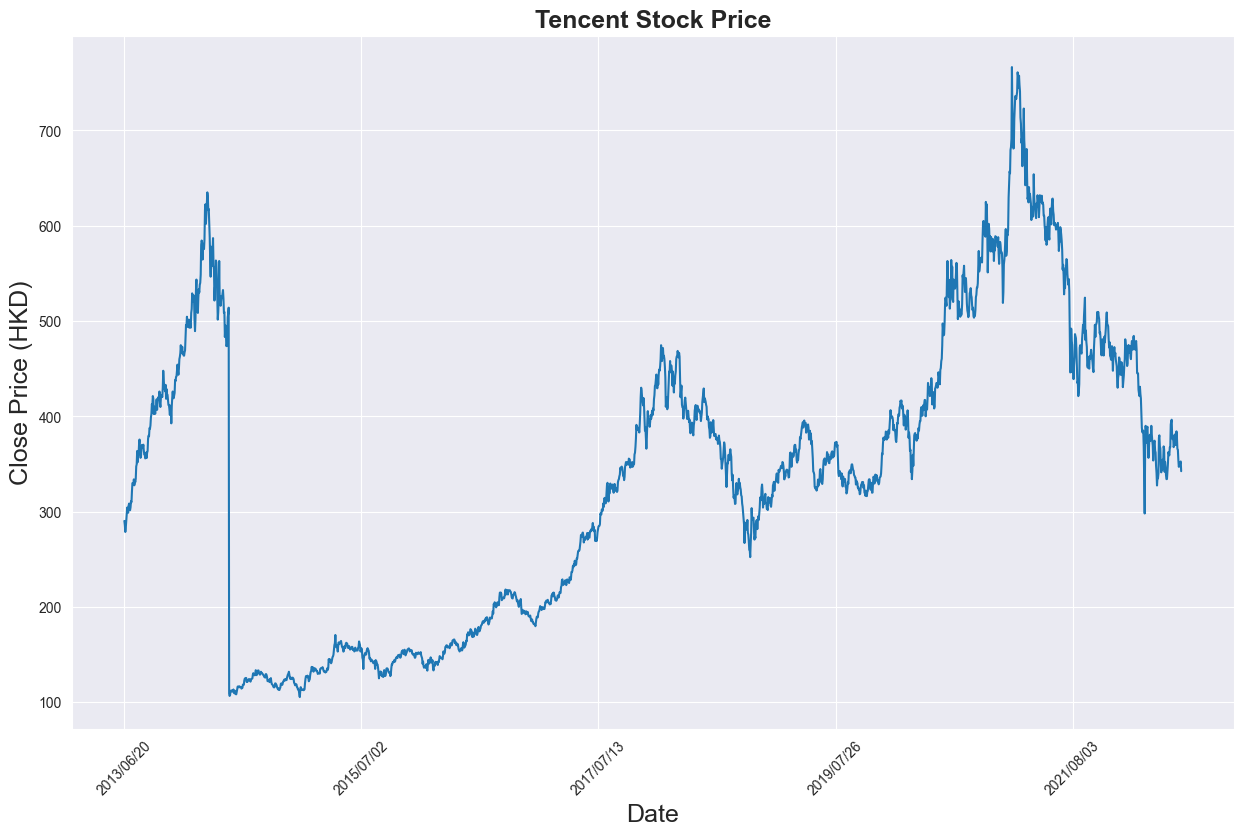

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data[['CLOSE']])
plt.xticks(range(0,data.shape[0],500),data['DATES'].loc[::500],rotation=45)
plt.title("Tencent Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (HKD)',fontsize=18)
plt.show()

首先对数据进行归一化的处理

In [203]:
price = data[['CLOSE']]
price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 2013/06/20 to 2022/07/11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   2230 non-null   float64
dtypes: float64(1)
memory usage: 34.8+ KB


In [204]:
price

,CLOSE
DATES,
2013/06/20,290.2
2013/06/21,285.8
2013/06/24,278.6
2013/06/25,283.4
2013/06/26,290.4
...,...
2022/07/05,348.8
2022/07/06,347.6
2022/07/07,351.6


In [205]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
price['CLOSE'] = scaler.fit_transform(price['CLOSE'].values.reshape(-1,1))

C:\Users\AndrewYijiaLi\AppData\Local\Temp\ipykernel_34416\3386048925.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [206]:
price

,CLOSE
DATES,
2013/06/20,-0.440714
2013/06/21,-0.454023
2013/06/24,-0.475802
2013/06/25,-0.461283
2013/06/26,-0.440109
...,...
2022/07/05,-0.263460
2022/07/06,-0.267090
2022/07/07,-0.254991


In [207]:
import numpy as np
import pandas as pd

def split_data(stock, lookback):
    data_raw = stock.to_numpy() 
    data = []

    # 将数据转化为特定步长的输出序列
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    return [x_train, y_train, x_test, y_test]

lookback = 20 # 选择你所需要的步长
x_train, y_train, x_test, y_test = split_data(price, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1768, 19, 1)
y_train.shape =  (1768, 1)
x_test.shape =  (442, 19, 1)
y_test.shape =  (442, 1)


In [208]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor).to("cuda")
x_test = torch.from_numpy(x_test).type(torch.Tensor).to("cuda")
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor).to("cuda")
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor).to("cuda")
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor).to("cuda")
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor).to("cuda")

In [209]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to("cuda")
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to("cuda")
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [210]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [211]:
import optuna
import torch.optim as optim
def objective(trial):
    input_dim = 1
    hidden_dim = 32
    num_layers = 2
    output_dim = 1
    model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
    model=model.to("cuda")
    criterion = torch.nn.MSELoss(reduction='mean')


    #尝试Adam, AdaDelta 和 Adagrad这几种优化算法
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "Adadelta","Adagrad"])
    lr= trial.suggest_float("lr", 1e-5, 1e-1,log=True)
    optimiser = getattr(optim, optimizer_name) (model.parameters(), lr=lr)
    num_epochs=trial.suggest_int("batch_size", 60, 260,step=10)



    for t in range(num_epochs):
        model.train()
        y_train_pred = model(x_train)

        loss = criterion(y_train_pred, y_train_lstm)
       # print("Epoch ", t, "MSE: ", loss.item())
        #hist[t] = loss.item()

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()


    return loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

print(study.best_params)
print(study.best_value)

[I 2023-03-15 21:15:13,644] A new study created in memory with name: no-name-809e51bb-3eef-4130-a62a-6ba7785484aa
[I 2023-03-15 21:15:15,228] Trial 0 finished with value: 0.002925852546468377 and parameters: {'optimizer': 'Adam', 'lr': 0.0028770146896212956, 'batch_size': 210}. Best is trial 0 with value: 0.002925852546468377.
[I 2023-03-15 21:15:15,779] Trial 1 finished with value: 0.3597627580165863 and parameters: {'optimizer': 'Adadelta', 'lr': 0.0026991262064337026, 'batch_size': 80}. Best is trial 0 with value: 0.002925852546468377.
[I 2023-03-15 21:15:16,829] Trial 2 finished with value: 0.14981518685817719 and parameters: {'optimizer': 'Adadelta', 'lr': 0.04085859585016268, 'batch_size': 140}. Best is trial 0 with value: 0.002925852546468377.
[I 2023-03-15 21:15:18,413] Trial 3 finished with value: 0.1504622846841812 and parameters: {'optimizer': 'Adadelta', 'lr': 0.025593485589116866, 'batch_size': 200}. Best is trial 0 with value: 0.002925852546468377.
[I 2023-03-15 21:15:19,

{'optimizer': 'Adam', 'lr': 0.07306760849742913, 'batch_size': 250}
0.0010199989192187786


In [212]:
import time

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
    model=model.to("cuda")
    model.train()
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time() - start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.38715583086013794
Epoch  1 MSE:  0.22443796694278717
Epoch  2 MSE:  0.13226774334907532
Epoch  3 MSE:  0.22563062608242035
Epoch  4 MSE:  0.12166397273540497
Epoch  5 MSE:  0.11335586756467819
Epoch  6 MSE:  0.12871263921260834
Epoch  7 MSE:  0.1288841813802719
Epoch  8 MSE:  0.11108614504337311
Epoch  9 MSE:  0.0818614736199379
Epoch  10 MSE:  0.055256448686122894
Epoch  11 MSE:  0.05447359383106232
Epoch  12 MSE:  0.06791256368160248
Epoch  13 MSE:  0.04166907072067261
Epoch  14 MSE:  0.01903294026851654
Epoch  15 MSE:  0.02000715211033821
Epoch  16 MSE:  0.026641884818673134
Epoch  17 MSE:  0.023277046158909798
Epoch  18 MSE:  0.011952169239521027
Epoch  19 MSE:  0.012063592672348022
Epoch  20 MSE:  0.02275492064654827
Epoch  21 MSE:  0.01849084347486496
Epoch  22 MSE:  0.008845859207212925
Epoch  23 MSE:  0.006096960976719856
Epoch  24 MSE:  0.007961232215166092
Epoch  25 MSE:  0.009521936997771263
Epoch  26 MSE:  0.009231114760041237
Epoch  27 MSE:  0.007989381439

In [213]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.to("cpu").detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm.to("cpu").detach().numpy()))

In [214]:
print(predict)
print(original)

               0
0     324.190887
1     327.500702
2     330.711517
3     331.665558
4     332.724976
...          ...
1763  506.914246
1764  505.630127
1765  508.753204
1766  513.368103
1767  518.523682

[1768 rows x 1 columns]
               0
0     327.799988
1     333.799988
2     327.600006
3     332.600006
4     330.800018
...          ...
1763  516.000000
1764  529.500000
1765  529.500000
1766  534.500000
1767  527.000000

[1768 rows x 1 columns]


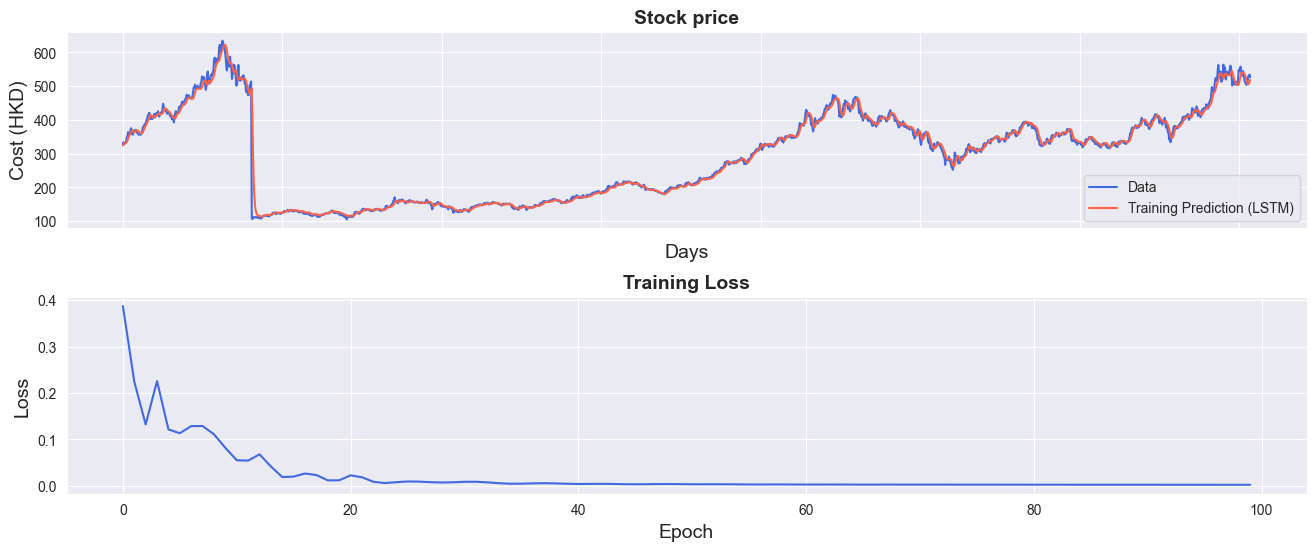

In [215]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.35, wspace=0.2)

plt.subplot(2, 1, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (HKD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(2, 1, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [216]:
import math, time
from sklearn.metrics import mean_squared_error

# 预测
y_test_pred = model(x_test)

y_train_pred = scaler.inverse_transform(y_train_pred.to("cpu").detach().numpy())
y_train = scaler.inverse_transform(y_train_lstm.to("cpu").detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.to("cpu").detach().numpy())
y_test = scaler.inverse_transform(y_test_lstm.to("cpu").detach().numpy())

# 计算误差
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)
lstm.append(training_time)

Train Score: 16.14 RMSE
Test Score: 20.53 RMSE


In [217]:
trainPredictPlot = np.empty_like(price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred


testPredictPlot = np.empty_like(price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price)-1, :] = y_test_pred

original = scaler.inverse_transform(price['CLOSE'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [218]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                                    mode='lines',
                                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                         mode='lines',
                         name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                                    mode='lines',
                                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template='plotly_dark'

)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                        xanchor='left', yanchor='bottom',
                        text='Results (LSTM)',
                        font=dict(family='Rockwell',
                                  size=26,
                                  color='white'),
                        showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()